## Observations and Insights 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
    
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df=pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID") 

merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.

mice_count=len(merge_df["Mouse ID"].unique())

print(f"There is a total of {mice_count} mice")

There is a total of 249 mice


In [23]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse=merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
#duplicate_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [32]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= merge_df.drop_duplicates(subset= ["Mouse ID", "Timepoint"], keep = 'last')


In [33]:
# Checking the number of mice in the clean DataFrame.
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mr_df=clean_df.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = mr_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = mr_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance = mr_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sd = mr_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem = mr_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

analysis_df=pd.DataFrame({"Mean ":mean,"Median ":median,"Variance":variance, "SD": sd, "SEM": sem})

# Formatting




In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
analysis_df=analysis_df.round(2)

analysis_df

# Using the aggregation method, produce the same summary statistics in a single line


,Mean,Median,Variance,SD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.38,50.78,43.22,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

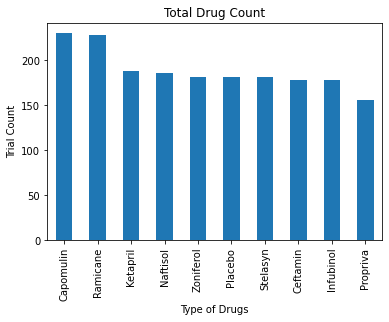

In [28]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_count = clean_df["Drug Regimen"].value_counts()

x_axis = drug_count.index
y_axis = drug_count.values

drug_count.plot(kind = 'bar')

#Formatting
plt.ylabel("Trial Count")
plt.xlabel("Type of Drugs")
plt.title("Total Drug Count")
plt.show()

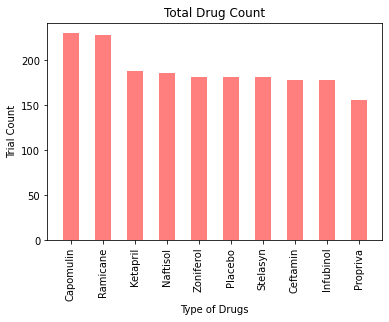

In [29]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_counts= clean_df["Drug Regimen"].value_counts()

#Creating variables for my axis
y_axis=drug_counts.values
x_axis=np.arange(0,len(y_axis),1)
x_drugs=drug_counts.index
                 
#Needs to be matplotlib
plt.bar(x_drugs, y_axis, color='r', alpha=0.5, align= "center", width= .5)

#Formatting
plt.ylabel("Trial Count")
plt.xlabel("Type of Drugs")
plt.title("Total Drug Count")
plt.xticks(rotation=90)

plt.show()

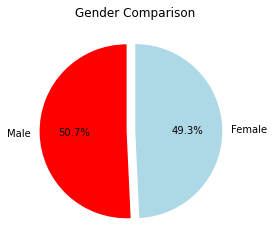

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mf_count = clean_df["Sex"].value_counts()
#mf_count

labels = mf_count.index
sizes = mf_count.values
colors = ["red" , "lightblue"]
explode=[0.1,0]
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",  startangle=90)

plt.title("Gender Comparison")
plt.show()


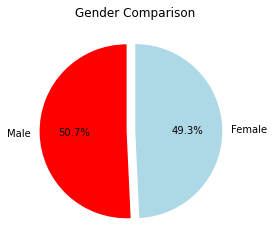

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mf_count = clean_df["Sex"].value_counts()
#mf_count

labels = mf_count.index
sizes = mf_count.values
colors = ["red" , "lightblue"]
explode=[0.1,0]
mf_count.plot(kind="pie", explode=explode, colors=colors, autopct="%1.1f%%", startangle=90)

plt.title("Gender Comparison")
plt.ylabel(" ")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
max_tumor=clean_df.groupby("Mouse ID").max().reset_index()
# Start by getting the last (greatest) timepoint for each mouse
merge_data=max_tumor[["Mouse ID","Timepoint"]].merge(clean_df, on=["Mouse ID","Timepoint"], how='left')

merge_data.round(2)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.97,2,Infubinol,Female,20,23
1,a251,45,65.53,1,Infubinol,Female,21,25
2,a262,45,70.72,4,Placebo,Female,17,29
3,a275,45,63.00,3,Ceftamin,Female,20,28
4,a366,30,63.44,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.71,0,Propriva,Female,12,26
244,z578,45,30.64,0,Ramicane,Male,11,16
245,z581,45,62.75,3,Infubinol,Female,24,25
246,z795,45,65.74,3,Naftisol,Female,13,29


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
capomulin= merge_data.loc[merge_data['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane= merge_data.loc[merge_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol=merge_data.loc[merge_data['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin= merge_data.loc[merge_data['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']


#Capomulin quartiles
quartile_cap= capomulin.quantile([.25,.5,.75])
lower_cap= quartile_cap[.25]
upper_cap=quartile_cap[.75]
iqr= upper_cap-lower_cap
#Infubionol Outliers
lower_ocap= lower_cap-(1.5*iqr)
upper_ocap= upper_cap+(1.5*iqr)

print(f"Any number below {round(lower_ocap, 2)} is considered an outlier")
print(f"Any number above {round(upper_ocap, 2)} is considered an outlier") 


Any number below 20.7 is considered an outlier
Any number above 51.83 is considered an outlier


In [14]:
#Ramicane quartiles
quartile_ram= ramicane.quantile([.25,.5,.75])
lower_ram= quartile_ram[.25]
upper_ram=quartile_ram[.75]
iqr= upper_ram-lower_ram
#Ramicane Outliers
lower_oram= lower_ram-(1.5*iqr)
upper_oram= upper_ram+(1.5*iqr)

print(f"Any number below {round(lower_oram, 2)} is considered an outlier")
print(f"Any number above {round(upper_oram, 2)} is considered an outlier")

Any number below 17.91 is considered an outlier
Any number above 54.31 is considered an outlier


In [15]:
#Infubionol quartiles
quartile_in=infubinol.quantile([.25,.5,.75])
lower_in= quartile_in[.25]
upper_in=quartile_in[.75]
iqr= upper_in-lower_in
#Infubionol Outliers
lower_oin= lower_in-(1.5*iqr)
upper_oin= upper_in+(1.5*iqr)

print(f"Any number below {round(lower_oin, 2)} is considered an outlier")
print(f"Any number above {round(upper_oin, 2)} is considered an outlier")

Any number below 36.83 is considered an outlier
Any number above 82.74 is considered an outlier


In [16]:
#Ceftmain quartiles
quartile_ce=ceftamin.quantile([.25,.5,.75])
lower_ce= quartile_ce[.25]
upper_ce=quartile_ce[.75]
iqr= upper_ce-lower_ce
#Ceftmain Outliers
lower_oce= lower_ce-(1.5*iqr)
upper_oce= upper_ce+(1.5*iqr)

print(f"Any number below {round(lower_oce, 2)} is considered an outlier")
print(f"Any number above {round(upper_oce, 2)} is considered an outlier")

Any number below 25.36 is considered an outlier
Any number above 87.67 is considered an outlier


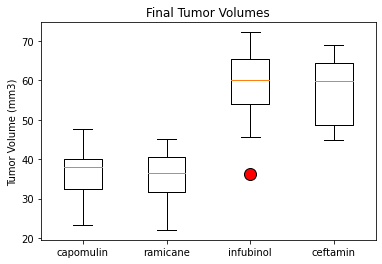

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='red',markersize=12)

#Make Box Plot
plt.boxplot([capomulin,ramicane, infubinol, ceftamin], labels=["capomulin","ramicane","infubinol","ceftamin"], flierprops= orange_out)

#Formatting
plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

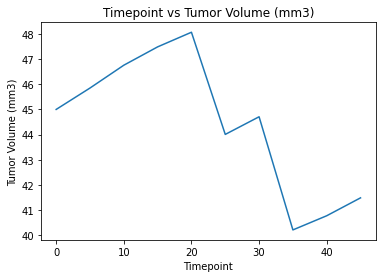

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_table= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
mouse= clean_df.loc[clean_df['Mouse ID'] == 'l509']



plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume (mm3)")
plt.show()


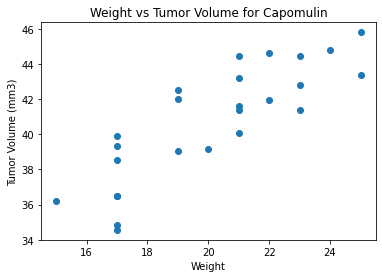

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_weight= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

cap_avg=capomulin_weight.groupby(["Mouse ID"]).mean()

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()


## Correlation and Regression

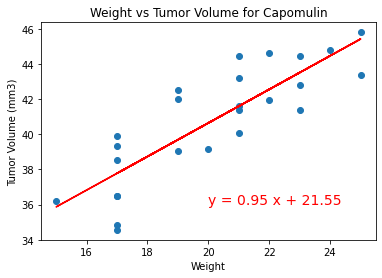

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
regress_values=cap_avg["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.plot(cap_avg["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), color='red', fontsize=14)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()


In [21]:
print(f"Correlation between these two variables is {round(rvalue,2)}")

Correlation between these two variables is 0.84
